In [24]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from landaupy import landau
from scipy.optimize import curve_fit

import analysis_data

In [79]:

import process_data
path_save = 'outnpy/LED_20240821_20240826_runinfo.h5py'
df = pd.DataFrame(run_info)
#process_data.write_to_hdf5(df, path_save)


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area_updated.Ch0_Area_mu, ratio, xerr=df_larger_area_updated.Ch0_Area_sigma, yerr=ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-9:-6], ratio[-9:-6], xerr=df_larger_area_updated.Ch0_Area_sigma[-9:-6], yerr=ratio_err[-9:-6], fmt='o', ecolor='red',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-6:], ratio[-6:], xerr=df_larger_area_updated.Ch0_Area_sigma[-6:], yerr=ratio_err[-6:], fmt='o', ecolor='blue',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.set_xlabel('LV2414 Anode (Ch0) Area [PE]')
ax.set_ylabel('LV2414 Anode(Ch0) to LV2415 Anode(Ch1) Ratio')
ax.set_title('LV2414 Anode to LV2415 Anode (with filter) Ratio vs LV2414 Anode Area ')
#for index, row in df_larger_area_updated.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(df_larger_area_updated['Ch0_Area_mu'][index], df_larger_area_updated['Ratio_fit_mu'][index] , s= str(df_larger_area_updated['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(-50, 200)
#ax.set_xlim(0, 1000)
#plt.savefig(r'./figs/LV2414_anode_to_LV2415_anode_Ratio_use_Gaussian_fit_combined_20240821_20240826_20240829_allruns.png',dpi=300)
plt.show()

In [ ]:
gain_ratio = df_larger_area_updated.Ch0_Area_mu / df_larger_area_updated.Ch2_Area_mu
gain_ratio_err = gain_ratio * np.sqrt((df_larger_area_updated.Ch0_Area_sigma/df_larger_area_updated.Ch0_Area_mu)**2 + (df_larger_area_updated.Ch2_Area_sigma/df_larger_area_updated.Ch2_Area_mu)**2)

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_larger_area_updated.Ch0_Area_mu, gain_ratio, xerr=df_larger_area_updated.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='o',  capsize=5, elinewidth=2, capthick=2, label='Ratio')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-9:-6], gain_ratio[-9:-6], xerr=df_larger_area_updated.Ch0_Area_sigma[-9:-6], yerr=gain_ratio_err[-9:-6], fmt='o', ecolor='red',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.errorbar(df_larger_area_updated.Ch0_Area_mu[-6:], gain_ratio[-6:], xerr=df_larger_area_updated.Ch0_Area_sigma[-6:], yerr=gain_ratio_err[-6:], fmt='o', ecolor='blue',  capsize=5, elinewidth=2, capthick=2, label='led100ns attenuator 9DB')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
#for index, row in df_larger_area_updated.iterrows():
#    for column_name, value in row.items(): 
#        ax.text(df_larger_area_updated['Ch0_Area_mu'][index], df_larger_area_updated['Ratio_fit_mu'][index] , s= str(df_larger_area_updated['file_tag'][index]), rotation='vertical', color='blue')  #rotation='vertical'   rotation='horizontal'  
ax.legend()
ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
#plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_vs_anode_Area_use_Gaussian_fit_combined_20240821_20240826_allruns.png',dpi=300)
plt.show()

In [143]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_100ns_900mv_20240924_backup.h5py'
df = pd.read_hdf(df_path, key='winfo')
df_path_0 = 'outnpy/df_100ns_900mv_9DB_20240904_20240920_tmp.h5py'
df0 = pd.read_hdf(df_path_0, key='winfo')

In [144]:
ratio = df.Ch0_Area_mu / df.Ch1_Area_mu 
ratio_err = ratio*np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.Ch1_Area_sigma/df.Ch1_Area_mu)**2)

ratio_0 = df0.Ch0_Area_mu / df0.Ch1_Area_mu 
ratio_err_0 = ratio_0*np.sqrt((df0.Ch0_Area_sigma/df0.Ch0_Area_mu)**2 + (df0.Ch1_Area_sigma/df0.Ch1_Area_mu)**2)

<function matplotlib.pyplot.show(close=None, block=None)>

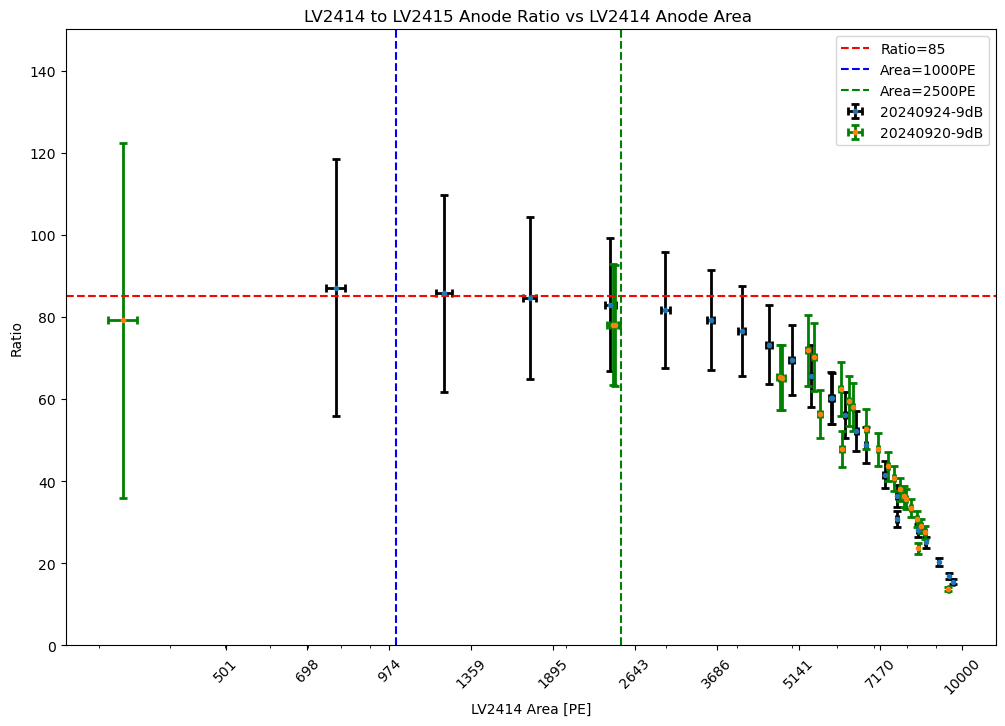

In [145]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, ratio, xerr=df.Ch0_Area_sigma, yerr=ratio_err, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='20240924-9dB')
ax.errorbar(df0.Ch0_Area_mu, ratio_0, xerr=df0.Ch0_Area_sigma, yerr=ratio_err_0, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='20240920-9dB')
ax.set_xlabel('LV2414 Area [PE]')
ax.set_ylabel('Ratio')
ax.set_title('LV2414 to LV2415 Anode Ratio vs LV2414 Anode Area ')
ax.set_xscale('log')
ax.axhline(y=85., color='r', linestyle='--', label='Ratio=85')
ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
# ax.axvline(x=10000, color='b', linestyle='--', label='Area=10000PE')
ax.axvline(x=2500, color='g', linestyle='--', label='Area=2500PE')
ax.legend(loc='upper right')
ax.set_xticks(np.logspace(2.7, 4, 10))
ax.set_xticklabels(np.logspace(2.7, 4, 10).astype(int), rotation=45)
#ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
plt.savefig(r'./figs/LV2414_LV2415_anode_Ratio_use_Gaussian_fit_20240924_.png', bbox_inches='tight', dpi=300)
plt.show

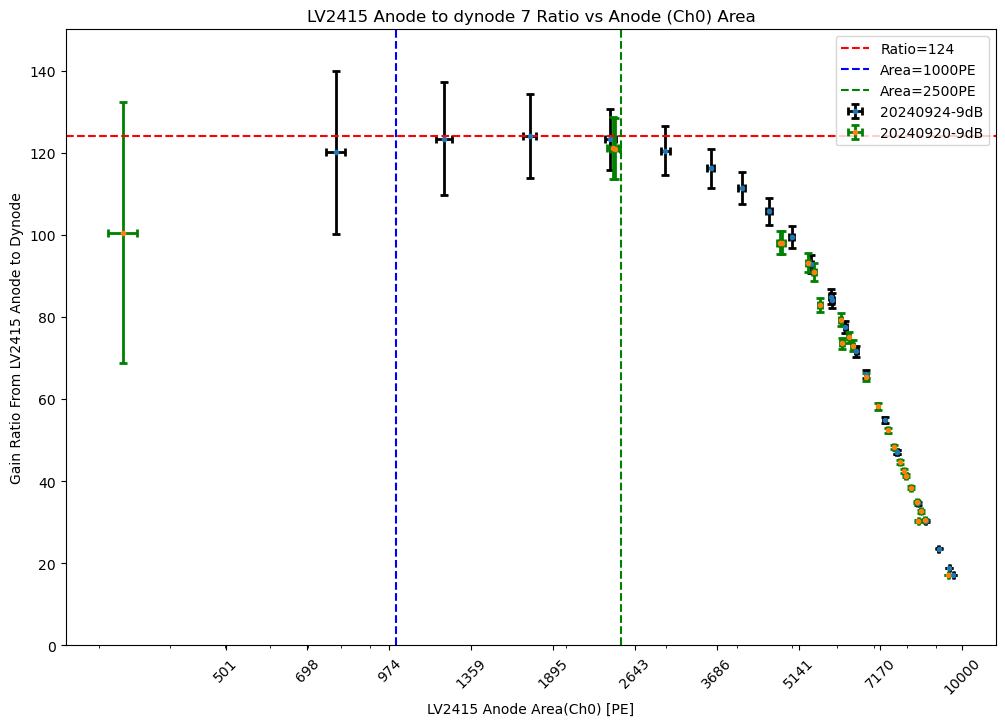

In [146]:
gain_ratio = df.Ch0_Area_mu / df.Ch2_Area_mu
gain_ratio_err = gain_ratio * np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.Ch2_Area_sigma/df.Ch2_Area_mu)**2)

gain_ratio_0 = df0.Ch0_Area_mu / df0.Ch2_Area_mu
gain_ratio_err_0 = gain_ratio_0 * np.sqrt((df0.Ch0_Area_sigma/df0.Ch0_Area_mu)**2 + (df0.Ch2_Area_sigma/df0.Ch2_Area_mu)**2)


fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, gain_ratio, xerr=df.Ch0_Area_sigma, yerr=gain_ratio_err, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='20240924-9dB')
ax.errorbar(df0.Ch0_Area_mu, gain_ratio_0, xerr=df0.Ch0_Area_sigma, yerr=gain_ratio_err_0, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='20240920-9dB')
ax.set_xlabel('LV2415 Anode Area(Ch0) [PE]')
ax.set_ylabel('Gain Ratio From LV2415 Anode to Dynode')
ax.set_title('LV2415 Anode to dynode 7 Ratio vs Anode (Ch0) Area')
ax.set_xscale('log')
ax.axhline(y=124., color='r', linestyle='--', label='Ratio=124')
ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=2500, color='g', linestyle='--', label='Area=2500PE')
ax.legend(loc='upper right')
ax.set_xticks(np.logspace(2.7, 4, 10))
ax.set_xticklabels(np.logspace(2.7, 4, 10).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 150)
#ax.set_xlim(0, 1000)
plt.savefig(r'./figs/LV2414_Anode_to_Dynode_Gain_Ratio_20240924.png',  bbox_inches='tight',  dpi=300)
plt.show()

In [34]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_100ns_900mv_20240924_backup.h5py'
# df_path = 'outnpy/df_20241014_intensity_1_tmp.h5py'
# df_path = 'outnpy/df_20241017_tmp.h5py'
# # df_path = 'outnpy/df_20240924_20241011_ledwidth_100ns_500ns_combined.h5py'
df = pd.read_hdf(df_path, key='winfo')

In [35]:
# df_path = 'outnpy/df_202401012_tmp.h5py'
# # df_path = 'outnpy/df_20240924_20241011_ledwidth_100ns_500ns_combined.h5py'
# df = pd.read_hdf(df_path, key='winfo')

In [36]:
df = df.eval('Gain_Ratio = Ch0_Area_mu / Ch2_Area_mu')
df.sort_values(by='Ch1_Area_mu')

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio
8,784.448286,31.079364,9.001924,3.215555,6.530890,1.045959,87.142293,31.318763,20240924_950mv_900mv_100ns_attenuator_9DB,120.113532
6,1216.805413,38.637041,14.196193,3.954167,9.859086,1.058253,85.713503,24.029028,20240924_965mv_900mv_100ns_attenuator_9DB,123.419699
7,1724.577599,45.655745,20.392685,4.720816,13.893644,1.082363,84.568442,19.704820,20240924_980mv_900mv_100ns_attenuator_9DB,124.127089
9,2391.849657,52.240849,28.820353,5.612226,19.405815,1.099492,82.991684,16.262418,20240924_1.000V_900mv_100ns_attenuator_9DB,123.254274
5,2991.136207,55.689459,36.610339,6.293250,24.826213,1.142458,81.701954,14.126553,20240924_1.010V_900mv_100ns_attenuator_9DB,120.482985
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348


In [37]:
# Ratio_of_filter = np.mean(df.Ratio_fit_mu[df.Ch0_Area_mu < 4000])
# Ratio_of_filter_err =  np.std(df.Ratio_fit_mu[df.Ch0_Area_mu < 4000]) 
# Gain_ratio_mu = np.mean(df.Gain_Ratio[df.Ch0_Area_mu < 4000])
# Gain_ratio_err =  np.std(df.Gain_Ratio[df.Ch0_Area_mu < 4000]) 
Ratio_of_filter = 83.55963261815212
Ratio_of_filter_err= 2.611696693187247
Gain_ratio_mu=121.26085465658046
Gain_ratio_err=2.729860386508014

In [38]:
dynode_fix = df.Ch2_Area_mu * Gain_ratio_mu
dynode_fix_err = dynode_fix * np.sqrt((df.Ch2_Area_sigma/df.Ch2_Area_mu)**2 + (Gain_ratio_err/Gain_ratio_mu)**2)
filter_fix = df.Ch1_Area_mu * Ratio_of_filter
filter_fix_err = filter_fix * np.sqrt((df.Ch1_Area_sigma/df.Ch1_Area_mu)**2 + (Ratio_of_filter_err/Ratio_of_filter)**2)

In [39]:
df['dynode_fix'] = dynode_fix
df['dynode_fix_err'] = dynode_fix_err
df['filter_fix'] = filter_fix
df['filter_fix_err'] = filter_fix_err

In [40]:
# for index, row in df.iterrows():
#     tmp1 =(row.Ch2_Area_sigma/row.Ch2_Area_mu)**2
#     tmp2 = (row.Ch1_Area_sigma/row.Ch1_Area_mu)**2
#     dynode_fix_err.append( row.dynode_fix * np.sqrt( tmp1**2 + (Gain_ratio_err/Gain_ratio_mu)**2) )
#     filter_fix_err.append( row.filter_fix * np.sqrt( tmp2**2+ (Ratio_of_filter_err/Ratio_of_filter)**2) )

In [41]:
yerr_dynode_fix =  np.abs( df.Ch0_Area_mu/df.dynode_fix *np.sqrt(df.Ch0_Area_sigma**2/df.Ch0_Area_mu**2 + df.dynode_fix_err**2/df.dynode_fix**2))
yerr_filter_fix = np.abs( df.Ch0_Area_mu/df.filter_fix *np.sqrt(df.Ch0_Area_sigma**2/df.Ch0_Area_mu**2 + df.filter_fix_err**2/df.filter_fix**2))
df['yerr_dynode_fix'] = yerr_dynode_fix
df['yerr_filter_fix'] = yerr_filter_fix
df[0:]

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517,6089.570477,205.469749,6002.234638,753.419240,0.028965,0.104851
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261,5231.378313,190.157504,5200.264566,701.088900,0.033334,0.118647
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348,7068.663232,224.009617,6894.920423,815.514580,0.025217,0.093074
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239,4444.131445,176.973987,4455.802276,648.549002,0.038696,0.133942
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549,3755.028038,165.489733,3793.410785,595.910742,0.044837,0.149717
5,2991.136207,55.689459,36.610339,6.293250,24.826213,1.142458,81.701954,14.126553,20240924_1.010V_900mv_100ns_attenuator_9DB,120.482985,3010.447760,154.224260,3059.146465,534.483626,0.054158,0.171800
6,1216.805413,38.637041,14.196193,3.954167,9.859086,1.058253,85.713503,24.029028,20240924_965mv_900mv_100ns_attenuator_9DB,123.419699,1195.521179,131.116614,1186.228660,332.482488,0.116210,0.289349
7,1724.577599,45.655745,20.392685,4.720816,13.893644,1.082363,84.568442,19.704820,20240924_980mv_900mv_100ns_attenuator_9DB,124.127089,1684.755155,136.618518,1704.005271,398.048880,0.087319,0.237930
8,784.448286,31.079364,9.001924,3.215555,6.530890,1.045959,87.142293,31.318763,20240924_950mv_900mv_100ns_attenuator_9DB,120.113532,791.941327,128.080744,752.197447,269.717184,0.164937,0.376222
9,2391.849657,52.240849,28.820353,5.612226,19.405815,1.099492,82.991684,16.262418,20240924_1.000V_900mv_100ns_attenuator_9DB,123.254274,2353.165732,143.464293,2408.218146,474.957798,0.065825,0.197081


In [42]:
# yerr_filter_dynode = df.filter_fix/df.dynode_fix * np.sqrt((df.filter_fix_err/df.filter_fix)**2 + (df.dynode_fix_err/df.dynode_fix)**2)

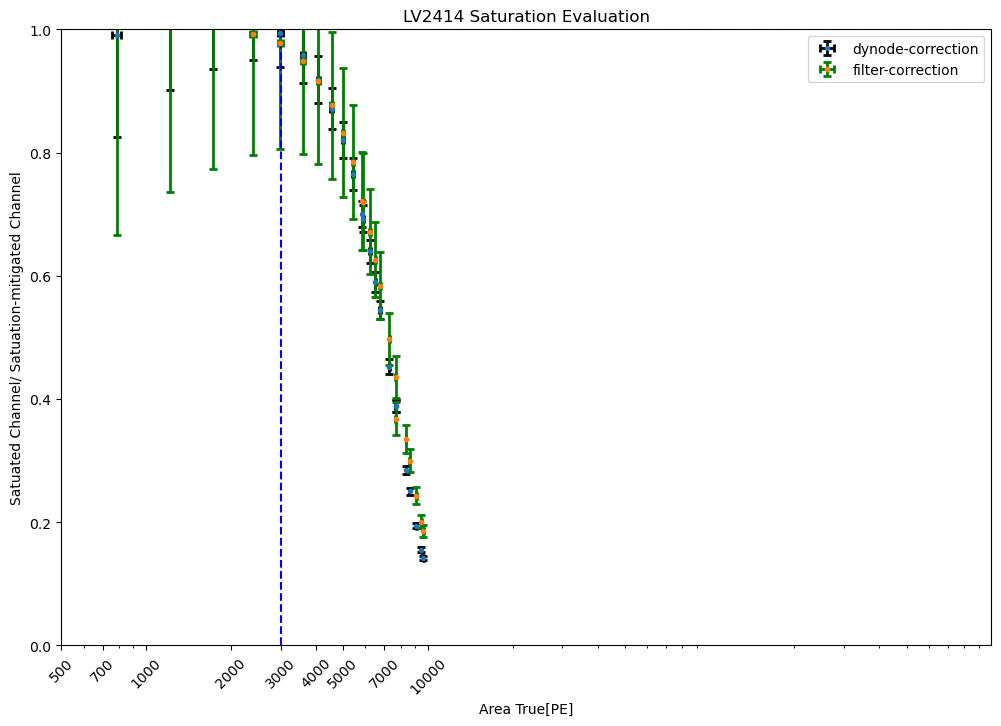

In [43]:

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.Ch0_Area_mu, df.Ch0_Area_mu/df.dynode_fix, xerr=df.Ch0_Area_sigma, yerr=yerr_dynode_fix, fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='dynode-correction')
ax.errorbar(df.Ch0_Area_mu , df.Ch0_Area_mu/df.filter_fix, xerr=df.Ch0_Area_sigma, yerr=np.abs(yerr_filter_fix), fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='filter-correction')
ax.set_xlabel('Area True[PE]')
ax.set_ylabel('Satuated Channel/ Satuation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.axhline(y=1., color='r', linestyle='--')
# ax.axvline(x=600, color='b', linestyle='--', label='Area=600PE')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper right')
ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 1)
ax.set_xlim(500, 1.e6)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

In [44]:
df.sort_values(by='filter_fix', inplace=True)
df

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix
8,784.448286,31.079364,9.001924,3.215555,6.530890,1.045959,87.142293,31.318763,20240924_950mv_900mv_100ns_attenuator_9DB,120.113532,791.941327,128.080744,752.197447,269.717184,0.164937,0.376222
6,1216.805413,38.637041,14.196193,3.954167,9.859086,1.058253,85.713503,24.029028,20240924_965mv_900mv_100ns_attenuator_9DB,123.419699,1195.521179,131.116614,1186.228660,332.482488,0.116210,0.289349
7,1724.577599,45.655745,20.392685,4.720816,13.893644,1.082363,84.568442,19.704820,20240924_980mv_900mv_100ns_attenuator_9DB,124.127089,1684.755155,136.618518,1704.005271,398.048880,0.087319,0.237930
9,2391.849657,52.240849,28.820353,5.612226,19.405815,1.099492,82.991684,16.262418,20240924_1.000V_900mv_100ns_attenuator_9DB,123.254274,2353.165732,143.464293,2408.218146,474.957798,0.065825,0.197081
5,2991.136207,55.689459,36.610339,6.293250,24.826213,1.142458,81.701954,14.126553,20240924_1.010V_900mv_100ns_attenuator_9DB,120.482985,3010.447760,154.224260,3059.146465,534.483626,0.054158,0.171800
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549,3755.028038,165.489733,3793.410785,595.910742,0.044837,0.149717
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239,4444.131445,176.973987,4455.802276,648.549002,0.038696,0.133942
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261,5231.378313,190.157504,5200.264566,701.088900,0.033334,0.118647
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517,6089.570477,205.469749,6002.234638,753.419240,0.028965,0.104851
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348,7068.663232,224.009617,6894.920423,815.514580,0.025217,0.093074


In [45]:
yerr_dynode_filter = df.dynode_fix/df.filter_fix * np.sqrt((df.filter_fix_err/df.filter_fix)**2 + (df.dynode_fix_err/df.dynode_fix)**2)
yerr_anode_filter = df.Ch0_Area_mu/df.filter_fix * np.sqrt((df.Ch0_Area_sigma/df.Ch0_Area_mu)**2 + (df.filter_fix_err/df.filter_fix)**2)
df['yerr_dynode_filter'] = yerr_dynode_filter
df['yerr_anode_filter'] = yerr_anode_filter

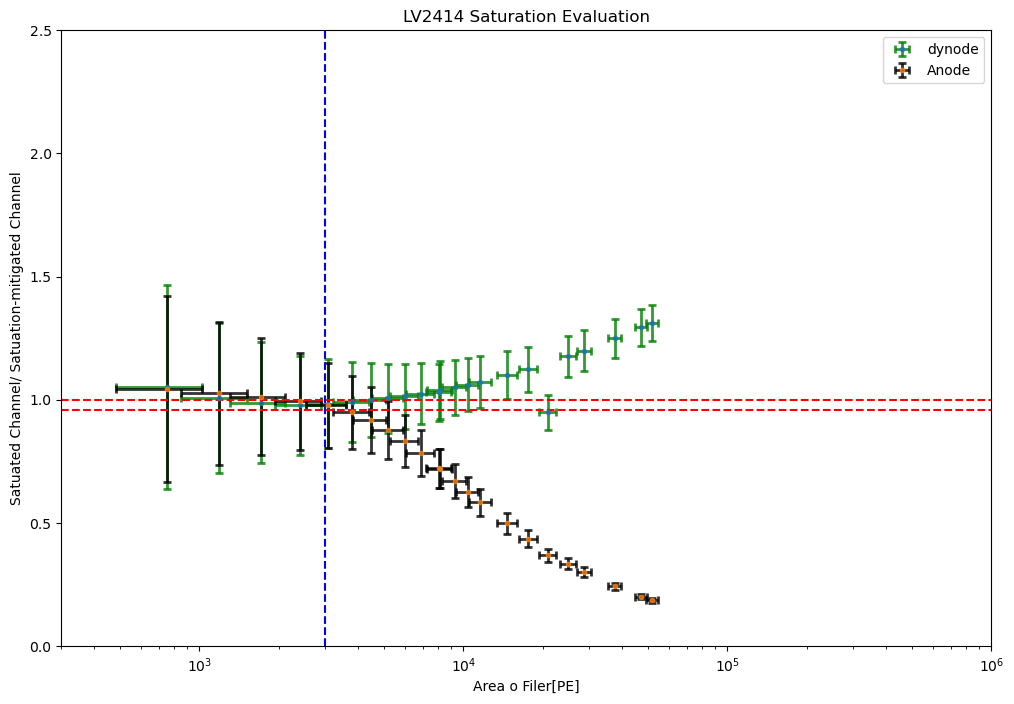

In [46]:

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.filter_fix, df.dynode_fix/df.filter_fix, xerr=df.filter_fix_err, yerr=yerr_dynode_filter, fmt='.', ecolor='green',alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='dynode')
ax.errorbar(df.filter_fix , df.Ch0_Area_mu/df.filter_fix, xerr=df.filter_fix_err, yerr=yerr_anode_filter, fmt='.', ecolor='black', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='Anode')
# ax.errorbar(df.filter_fix , df.Ch0_Area_mu/df.filter_fix, xerr=df.filter_fix_err, yerr=yerr_anode_filter, fmt='.', ecolor='black', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='Anode')
ax.set_xlabel('Area o Filer[PE]')
ax.set_ylabel('Satuated Channel/ Satuation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.axhline(y=1., color='r', linestyle='--')
ax.axhline(y=.96, color='r', linestyle='--')
# ax.axvline(x=600, color='b', linestyle='--', label='Area=600PE')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper right')
#ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
#ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
ax.set_ylim(0, 2.5)
ax.set_xlim(300, 1.e6)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

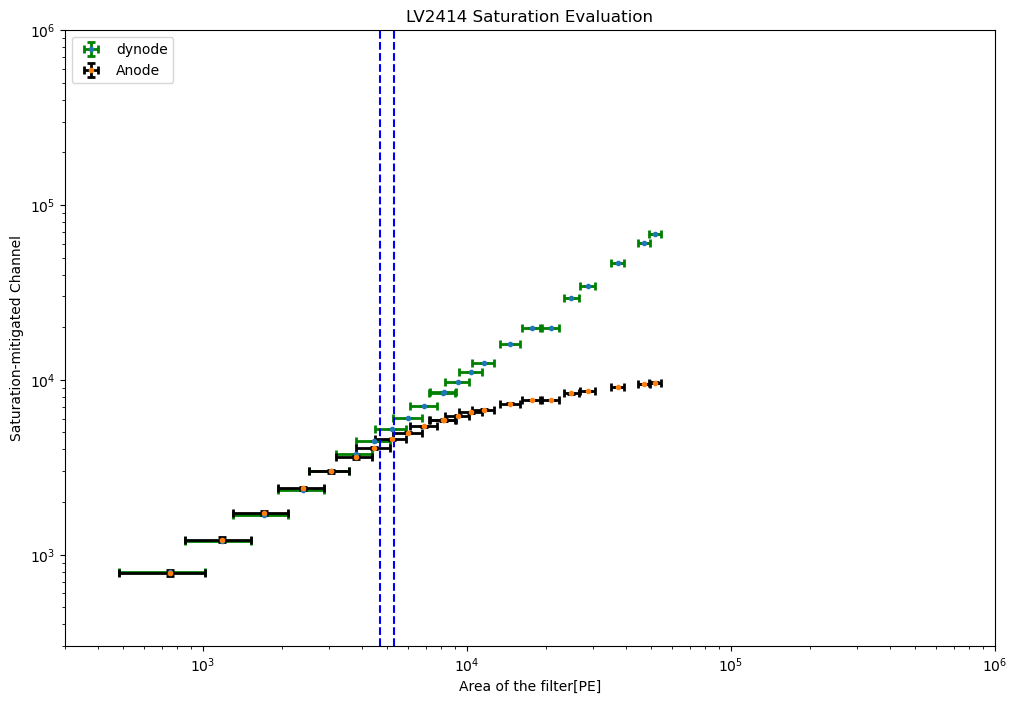

In [53]:

fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df.filter_fix, df.dynode_fix, xerr=df.filter_fix_err, yerr=df.yerr_dynode_fix, fmt='.', ecolor='g', capsize=3, elinewidth=2, capthick=2, label='dynode')
ax.errorbar(df.filter_fix , df.Ch0_Area_mu, xerr=df.filter_fix_err, yerr=df.Ch0_Area_sigma,  fmt='.', ecolor='black', capsize=3, elinewidth=2, capthick=2, label='Anode')
# ax.errorbar(df.filter_fix[df.file_tag=='20241011_965mV_900mv_100ns_attenuator_9DB'] , df.Ch0_Area_mu[df.file_tag=='20241011_965mV_900mv_100ns_attenuator_9DB'],
#             xerr=df.filter_fix_err[df.file_tag=='20241011_965mV_900mv_100ns_attenuator_9DB'], yerr=df.Ch0_Area_sigma[df.file_tag=='20241011_965mV_900mv_100ns_attenuator_9DB'], 
#             fmt='.', ecolor='blue', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='950pe/100ns')
# ax.errorbar(df.filter_fix[df.file_tag=='20241011_920mv_900mv_200ns_attenuator_9DB'] , df.Ch0_Area_mu[df.file_tag=='20241011_920mv_900mv_200ns_attenuator_9DB'],
#             xerr=df.filter_fix_err[df.file_tag=='20241011_920mv_900mv_200ns_attenuator_9DB'], yerr=df.Ch0_Area_sigma[df.file_tag=='20241011_920mv_900mv_200ns_attenuator_9DB'], 
#             fmt='.', ecolor='blue', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='2381pe/200ns')
# ax.errorbar(df.filter_fix[df.file_tag=='20241011_900mv_900mv_300ns_attenuator_9DB'] , df.Ch0_Area_mu[df.file_tag=='20241011_900mv_900mv_300ns_attenuator_9DB'],
#             xerr=df.filter_fix_err[df.file_tag=='20241011_900mv_900mv_300ns_attenuator_9DB'], yerr=df.Ch0_Area_sigma[df.file_tag=='20241011_900mv_900mv_300ns_attenuator_9DB'], 
#             fmt='.', ecolor='blue', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='3325pe/300ns')
# ax.errorbar(df.filter_fix[df.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'] , df.Ch0_Area_mu[df.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'],
#             xerr=df.filter_fix_err[df.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'], yerr=df.Ch0_Area_sigma[df.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'], 
#             fmt='.', ecolor='red', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='4027pe/400ns')
# ax.errorbar(df.filter_fix[df.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'] , df.Ch0_Area_mu[df.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'],
#             xerr=df.filter_fix_err[df.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'], yerr=df.Ch0_Area_sigma[df.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'], 
#             fmt='.', ecolor='red', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='5274pe/500ns')


ax.set_xlabel('Area of the filter[PE]')
ax.set_ylabel('Saturation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.axhline(y=4000., color='b', linestyle='--')
ax.axvline(x=5300, color='b', linestyle='--')
ax.axvline(x=4700, color='b', linestyle='--')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
#ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper left')
#ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
#ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
#ax.set_ylim(0, 1.5)
ax.set_xlim(300, 1.e6)
ax.set_ylim(300, 1.e6)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

In [27]:
# path = 'outnpy/df_fixed_area_vs_dynode_filter_20241017_intensity.h5py'
# process_data.write_to_hdf5(df, path)


h5 Write Time: 0.01 s 
h5 File Size: 1.03 MB
Save to outnpy/df_fixed_area_vs_dynode_filter_20241017_intensity.h5py


(0.012464046478271484, 1075351)

In [51]:
# df.filter_fix[  df.file_tag=='20241011_965mV_900mv_100ns_attenuator_9DB']
# cuts = df.dynode_fix/df.filter_fix < 0.96
# df.file_tag[cuts]
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20240924.h5py'
df_0924 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241011_202401012_combined.h5py'
df_1012 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241014.h5py'
df_1014 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241014_intensity_1.h5py'
df_1014_1 = pd.read_hdf(df_path, key='winfo')
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241017_intensity.h5py'
df_1017 = pd.read_hdf(df_path, key='winfo')

/tmp/ipykernel_709173/352669592.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(000, 3e6)
/tmp/ipykernel_709173/352669592.py:50: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(00, 3e6)


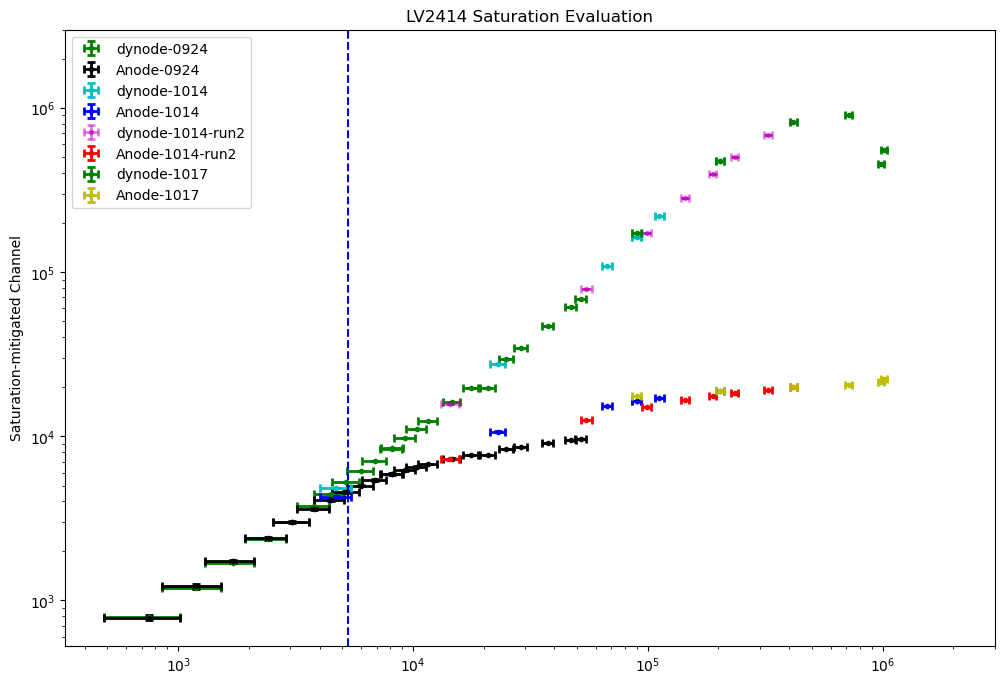

In [66]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_0924.filter_fix, df_0924.dynode_fix, xerr=df_0924.filter_fix_err, yerr=df_0924.yerr_dynode_fix, fmt='.', ecolor='g', mfc='g', mec='g',  capsize=3, elinewidth=2, capthick=2, label='dynode-0924')
ax.errorbar(df_0924.filter_fix , df_0924.Ch0_Area_mu, xerr=df_0924.filter_fix_err, yerr=df_0924.Ch0_Area_sigma,  fmt='.', ecolor='black', mfc='black', mec='black',  capsize=3, elinewidth=2, capthick=2, label='Anode-0924')
#ax.errorbar(df_1012.filter_fix, df_1012.dynode_fix, xerr=df_1012.filter_fix_err, yerr=df_1012.yerr_dynode_fix, fmt='.', ecolor='blue', capsize=3, elinewidth=2, capthick=2, label='dynode-1012')
#ax.errorbar(df_1012.filter_fix , df_1012.Ch0_Area_mu, xerr=df_1012.filter_fix_err, yerr=df_1012.Ch0_Area_sigma,  fmt='.', ecolor='red', capsize=3, elinewidth=2, capthick=2, label='Anode-1012')
ax.errorbar(df_1014.filter_fix, df_1014.dynode_fix, xerr=df_1014.filter_fix_err, yerr=df_1014.yerr_dynode_fix, fmt='.', ecolor='c', mfc='c',mec='c',   alpha=1, capsize=3, elinewidth=2, capthick=2, label='dynode-1014')
ax.errorbar(df_1014.filter_fix , df_1014.Ch0_Area_mu, xerr=df_1014.filter_fix_err, yerr=df_1014.Ch0_Area_sigma,  fmt='.', ecolor='b', mfc='b', mec='b',  capsize=3, elinewidth=2, capthick=2, label='Anode-1014')
ax.errorbar(df_1014_1.filter_fix, df_1014_1.dynode_fix, xerr=df_1014_1.filter_fix_err, yerr=df_1014_1.yerr_dynode_fix, fmt='.', ecolor='m', mfc='m', mec='m',   alpha=0.5,  capsize=3, elinewidth=2, capthick=2, label='dynode-1014-run2')
ax.errorbar(df_1014_1.filter_fix , df_1014_1.Ch0_Area_mu, xerr=df_1014_1.filter_fix_err, yerr=df_1014_1.Ch0_Area_sigma,  fmt='.', ecolor='r', mfc='r', mec='r',  capsize=3, elinewidth=2, capthick=2, label='Anode-1014-run2')
ax.errorbar(df_1017.filter_fix, df_1017.dynode_fix, xerr=df_1017.filter_fix_err, yerr=df_1017.yerr_dynode_fix, fmt='.', ecolor='g', mfc='g', mec='g',  capsize=3, elinewidth=2, capthick=2, label='dynode-1017')
ax.errorbar(df_1017.filter_fix , df_1017.Ch0_Area_mu, xerr=df_1017.filter_fix_err, yerr=df_1017.Ch0_Area_sigma,  fmt='.', ecolor='y', mfc='y', mec='y',  capsize=3, elinewidth=2, capthick=2, label='Anode-1017')


# ax.errorbar(df_1012.filter_fix[df_1012.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'] , df_1012.Ch0_Area_mu[df_1012.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'],
#             xerr=df_1012.filter_fix_err[df_1012.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'], yerr=df_1012.Ch0_Area_sigma[df_1012.file_tag=='20241011_888mv_900mv_400ns_attenuator_9DB'], 
#             fmt='.', ecolor='yellow', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='4000pe/400ns')
# ax.errorbar(df_1012.filter_fix[df_1012.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'] , df_1012.Ch0_Area_mu[df_1012.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'],
#             xerr=df_1012.filter_fix_err[df_1012.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'], yerr=df_1012.Ch0_Area_sigma[df_1012.file_tag=='20241011_885mv_900mv_500ns_attenuator_9DB'], 
#             fmt='.', ecolor='yellow', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='5300pe/500ns')
# ax.errorbar(df_1012.filter_fix[df_1012.file_tag=='20241012_1.050v_900mv_100ns_attenuator_9DB'] , df_1012.Ch0_Area_mu[df_1012.file_tag=='20241012_1.050v_900mv_100ns_attenuator_9DB'],
#             xerr=df_1012.filter_fix_err[df_1012.file_tag=='20241012_1.050v_900mv_100ns_attenuator_9DB'], yerr=df_1012.Ch0_Area_sigma[df_1012.file_tag=='20241012_1.050v_900mv_100ns_attenuator_9DB'], 
#             fmt='.', ecolor='yellow', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='5000pe/100ns')
# ax.errorbar(df_1012.filter_fix[df_1012.file_tag=='20241012_1.001v_900mv_200ns_attenuator_9DB'] , df_1012.Ch0_Area_mu[df_1012.file_tag=='20241012_1.001v_900mv_200ns_attenuator_9DB'],
#             xerr=df_1012.filter_fix_err[df_1012.file_tag=='20241012_1.001v_900mv_200ns_attenuator_9DB'], yerr=df_1012.Ch0_Area_sigma[df_1012.file_tag=='20241012_1.001v_900mv_200ns_attenuator_9DB'], 
#             fmt='.', ecolor='red', alpha=1.0, capsize=3, elinewidth=2, capthick=2, label='10000pe/200ns')
# ax.errorbar(df_1012.filter_fix[df_1012.file_tag=='20241012_1.650v_900mv_400ns_attenuator_9DB'] , df_1012.Ch0_Area_mu[df_1012.file_tag=='20241012_1.650v_900mv_400ns_attenuator_9DB'],
#             xerr=df_1012.filter_fix_err[df_1012.file_tag=='20241012_1.650v_900mv_400ns_attenuator_9DB'], yerr=df_1012.Ch0_Area_sigma[df_1012.file_tag=='20241012_1.650v_900mv_400ns_attenuator_9DB'], 
#             fmt='.', ecolor='red', alpha=0.8, capsize=3, elinewidth=2, capthick=2, label='20000pe/400ns')
# ax.errorbar(df_1012.filter_fix[df_1012.file_tag=='20241012_3.540v_900mv_600ns_attenuator_9DB'] , df_1012.Ch0_Area_mu[df_1012.file_tag=='20241012_3.540v_900mv_600ns_attenuator_9DB'],
#             xerr=df_1012.filter_fix_err[df_1012.file_tag=='20241012_3.540v_900mv_600ns_attenuator_9DB'], yerr=df_1012.Ch0_Area_sigma[df_1012.file_tag=='20241012_3.540v_900mv_600ns_attenuator_9DB'], 
#             fmt='.', ecolor='red', alpha=0.7, capsize=3, elinewidth=2, capthick=2, label='21000pe/600ns')


ax.set_ylabel('Saturation-mitigated Channel')
ax.set_title('')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.axhline(y=4000., color='b', linestyle='--')
ax.axvline(x=5300, color='b', linestyle='--')
# ax.axvline(x=1000, color='b', linestyle='--', label='Area=1000PE')
#ax.axvline(x=3000, color='b', linestyle='--') 
ax.legend(loc='upper left')
#ax.set_xticks([500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000])
#ax.set_xticklabels([500, 700, 1000, 2000, 3000, 4000, 5000, 7000,10000], rotation=45)
#ax.set_xticks(np.logspace(2, 4, 10+4))
#ax.set_xticklabels(np.logspace(2, 4, 10+4).astype(int), rotation=45)
# ax.grid()
#ax.set_ylim(0, 1.5)
ax.set_xlim(000, 3e6)
ax.set_ylim(00, 3e6)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

In [196]:
# path = 'outnpy/df_fixed_area_vs_dynode_filter_20241011_202401012_combined.h5py'
# process_data.write_to_hdf5(df, path)


h5 Write Time: 0.01 s 
h5 File Size: 1.03 MB
Save to outnpy/df_fixed_area_vs_dynode_filter_20241011_202401012_combined.h5py


(0.011366844177246094, 1075644)

In [11]:
df_1014_1.head()

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix,yerr_dynode_filter,yerr_anode_filter
0,7241.474849,42.048048,172.892225,14.078834,130.298350,2.254434,41.884329,3.419354,20241014_1.120v_900mv_100ns_attenuator_9DB,55.576105,15800.089297,448.612923,14446.810831,1260.102973,0.013282,0.043818,0.100321,0.043818
1,12563.786341,37.177213,655.657493,27.335094,646.888780,3.912245,19.162118,0.800900,20241014_1.120v_900mv_200ns_attenuator_9DB,19.421865,78442.286298,1828.528620,54786.499209,2854.715494,0.003764,0.011968,0.081730,0.011968
2,15069.591536,30.485267,1184.839429,36.513192,1417.815505,6.085628,12.718678,0.392795,20241014_1.120v_900mv_300ns_attenuator_9DB,10.628739,171925.519871,3940.160040,99004.747379,4345.612050,0.002017,0.006688,0.085986,0.006688
3,16529.039699,25.258362,1722.097817,43.978085,2319.211949,8.033930,9.598200,0.245553,20241014_1.120v_900mv_400ns_attenuator_9DB,7.127007,281229.623097,6405.638890,143897.860928,5807.967022,0.001342,0.004640,0.090576,0.004640
4,17488.884750,21.419266,2260.476643,50.013859,3242.769560,9.511164,7.736813,0.171442,20241014_1.120v_900mv_500ns_attenuator_9DB,5.393194,393221.008295,8927.123511,188884.597842,7233.162442,0.001011,0.003547,0.092678,0.003547


In [12]:
df_1014.head()

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix,yerr_dynode_filter,yerr_anode_filter
0,4238.306096,59.396934,56.429812,8.245320,39.716825,1.977170,75.107571,11.024809,20241014_1.040v_900mv_100ns_attenuator_9DB,106.713115,4816.096131,263.128929,4715.254328,704.562232,0.049637,0.134897,0.162500,0.134897
1,10633.733325,46.350180,274.648336,17.697496,227.993224,2.627264,38.717632,2.500547,20241014_1.040v_900mv_200ns_attenuator_9DB,46.640567,27646.653257,699.188728,22949.514037,1643.579977,0.009871,0.033245,0.091497,0.033245
2,15214.565098,35.133832,799.778065,30.185560,894.446482,5.189055,19.023484,0.719335,20241014_1.040v_900mv_400ns_attenuator_9DB,17.010034,108461.344908,2521.487008,66829.161254,3274.898627,0.003277,0.011169,0.088028,0.011169
5,16340.659051,31.406672,1071.707805,34.575480,1341.233796,6.735742,15.247308,0.492781,20241014_1.040v_900mv_500ns_attenuator_9DB,12.183304,162639.156456,3751.378883,89551.510472,4022.592092,0.002325,0.008204,0.091707,0.008204
6,16340.659051,31.406672,1071.707805,34.575480,1341.233796,6.735742,15.247308,0.492781,20241014_1.040v_900mv_500ns_attenuator_9DB,12.183304,162639.156456,3751.378883,89551.510472,4022.592092,0.002325,0.008204,0.091707,0.008204


In [4]:
df_0924[0:]

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix,yerr_dynode_filter,yerr_anode_filter
8,784.448286,31.079364,9.001924,3.215555,6.530890,1.045959,87.142293,31.318763,20240924_950mv_900mv_100ns_attenuator_9DB,120.113532,791.941327,128.080744,752.197447,269.717184,0.164937,0.376222,0.414142,0.376222
6,1216.805413,38.637041,14.196193,3.954167,9.859086,1.058253,85.713503,24.029028,20240924_965mv_900mv_100ns_attenuator_9DB,123.419699,1195.521179,131.116614,1186.228660,332.482488,0.116210,0.289349,0.303336,0.289349
7,1724.577599,45.655745,20.392685,4.720816,13.893644,1.082363,84.568442,19.704820,20240924_980mv_900mv_100ns_attenuator_9DB,124.127089,1684.755155,136.618518,1704.005271,398.048880,0.087319,0.237930,0.244477,0.237930
9,2391.849657,52.240849,28.820353,5.612226,19.405815,1.099492,82.991684,16.262418,20240924_1.000V_900mv_100ns_attenuator_9DB,123.254274,2353.165732,143.464293,2408.218146,474.957798,0.065825,0.197081,0.201713,0.197081
5,2991.136207,55.689459,36.610339,6.293250,24.826213,1.142458,81.701954,14.126553,20240924_1.010V_900mv_100ns_attenuator_9DB,120.482985,3010.447760,154.224260,3059.146465,534.483626,0.054158,0.171800,0.179174,0.171800
4,3597.306024,56.670779,45.397648,6.988979,30.966531,1.173257,79.239921,12.262710,20240924_1.020V_900mv_100ns_attenuator_9DB,116.167549,3755.028038,165.489733,3793.410785,595.910742,0.044837,0.149717,0.161505,0.149717
3,4082.233209,56.095315,53.324819,7.580448,36.649350,1.203854,76.554094,10.933355,20240924_1.030V_900mv_100ns_attenuator_9DB,111.386239,4444.131445,176.973987,4455.802276,648.549002,0.038696,0.133942,0.150506,0.133942
1,4558.733190,54.319974,62.234172,8.161690,43.141526,1.231217,73.251287,9.646099,20240924_1.040V_900mv_100ns_attenuator_9DB,105.669261,5231.378313,190.157504,5200.264566,701.088900,0.033334,0.118647,0.140468,0.118647
0,4996.692712,51.831023,71.831750,8.732552,50.218766,1.262149,69.561061,8.487233,20240924_1.050V_900mv_100ns_attenuator_9DB,99.498517,6089.570477,205.469749,6002.234638,753.419240,0.028965,0.104851,0.131870,0.104851
2,5409.963700,48.787700,82.514968,9.412742,58.293035,1.300190,65.563422,7.502361,20240924_1.060V_900mv_100ns_attenuator_9DB,92.806348,7068.663232,224.009617,6894.920423,815.514580,0.025217,0.093074,0.125535,0.093074


In [3]:
df_1012[0:]

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ratio_fit_mu,Ratio_fit_sigma,file_tag,Gain_Ratio,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix,yerr_dynode_filter,yerr_anode_filter
8,594.293337,28.290805,6.362943,3.068521,5.411653,1.440870,93.399134,45.260530,20241012_818.0mv_900mv_400ns_attenuator_9DB,109.817334,656.221702,175.344520,5.316852e+02,256.942458,0.245797,0.542781,0.681557,0.542781
4,953.938093,34.359702,11.471226,3.606339,7.893993,1.044291,83.159212,26.314728,20241011_965mV_900mv_100ns_attenuator_9DB,120.843546,957.232323,128.452088,9.585314e+02,302.829957,0.138463,0.316454,0.342784,0.316454
3,2381.079991,56.037308,28.808705,5.736030,18.944050,1.095290,82.651407,16.571077,20241011_920mv_900mv_200ns_attenuator_9DB,125.690123,2297.171702,142.528731,2.407245e+03,485.170108,0.068783,0.200710,0.201237,0.200710
2,3325.289175,66.302801,40.412134,6.730397,25.907188,1.139492,82.284424,13.801837,20241011_900mv_900mv_300ns_attenuator_9DB,128.353921,3141.527774,155.223316,3.376823e+03,572.207611,0.056398,0.168017,0.164209,0.168017
1,4027.873305,74.572193,48.709552,7.504574,32.890850,1.560319,82.691651,12.831778,20241011_888mv_900mv_400ns_attenuator_9DB,122.461819,3988.372557,209.429108,4.070152e+03,639.853247,0.056230,0.156648,0.162414,0.156648
0,5274.319599,85.725219,63.805392,8.466636,43.280475,1.620698,82.662601,11.050864,20241011_885mv_900mv_500ns_attenuator_9DB,121.863718,5248.227368,229.308239,5.331555e+03,726.829664,0.046849,0.135818,0.140919,0.135818
5,4810.142256,54.894861,69.185506,8.901175,47.634973,1.615901,69.525288,8.980012,20241012_1.050v_900mv_100ns_attenuator_9DB,100.979216,5776.257581,235.168538,5.781115e+03,765.412605,0.035210,0.110570,0.138401,0.110570
6,9224.508869,54.646036,168.371153,13.733774,128.069302,1.947130,54.786754,4.480641,20241012_1.001v_900mv_200ns_attenuator_9DB,72.027478,15529.792980,421.872374,1.406903e+04,1228.953629,0.016515,0.057405,0.100976,0.057405
7,18626.772216,14.999312,8978.697882,64.060053,5147.900467,2.962592,2.074552,0.014895,20241012_1.650v_900mv_400ns_attenuator_9DB,3.618324,624238.810303,14057.640625,7.502567e+05,24052.821976,0.000672,0.000796,0.032598,0.000796
9,21029.313179,8.399114,13261.352269,22.405242,2972.443250,2.572211,1.585759,0.002753,20241012_3.540v_900mv_600ns_attenuator_9DB,7.074757,360441.008926,8120.347609,1.108114e+06,34685.193106,0.001315,0.000594,0.012544,0.000594


In [48]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# from landaupy import landau
# from scipy.optimize import curve_fit

import analysis_data
import process_data
import pandas as pd
df_path = 'outnpy/df_fixed_area_vs_dynode_filter_20241017_intensity.h5py'
df_1017 = pd.read_hdf(df_path, key='winfo')

In [67]:
pe_intensity  = df_1017.filter_fix / (df_1017.Ch0_width_mu *4)
pe_intensity_err = df_1017.filter_fix_err / df_1017.Ch0_width_mu *np.sqrt(df_1017.Ch0_width_sigma**2/df_1017.Ch0_width_mu**2 + df_1017.filter_fix_err**2/df_1017.filter_fix**2)
df_1017['pe_intensity'] = pe_intensity
df_1017['pe_intensity_err'] = pe_intensity_err


In [68]:
df_1017

,Ch0_Area_mu,Ch0_Area_sigma,Ch1_Area_mu,Ch1_Area_sigma,Ch2_Area_mu,Ch2_Area_sigma,Ch0_width_mu,Ch0_width_sigma,tau,Ratio_fit_mu,...,dynode_fix,dynode_fix_err,filter_fix,filter_fix_err,yerr_dynode_fix,yerr_filter_fix,yerr_dynode_filter,yerr_anode_filter,pe_intensity,pe_intensity_err
2,17560.513601,39.344518,1074.920935,35.536263,1425.889536,8.893922,244.426576,0.602319,280.0,16.336563,...,172904.583783,4039.124232,8.982000e+04,4086.395821,0.002383,0.008905,0.098450,0.008905,91.868077,0.761720
1,18886.179032,25.397826,2439.963460,53.172676,3931.158469,13.522812,246.073113,0.445043,165.0,7.740353,...,476695.635785,10856.071656,2.038825e+05,7768.467766,0.000904,0.003532,0.103787,0.003532,207.136050,1.204247
0,19826.658952,15.689467,4982.000572,73.967581,6761.389002,10.809543,247.592652,0.426616,170.0,3.979658,...,819891.809013,18504.131948,4.162941e+05,14404.845285,0.000546,0.001648,0.081364,0.001648,420.341773,2.015658
6,20640.171196,13.571837,8589.844716,86.069053,7466.297734,5.756820,248.935718,0.286711,300.0,2.402857,...,905369.644366,20393.901396,7.177643e+05,23558.668415,0.000514,0.000944,0.050213,0.000944,720.832946,3.108133
10,21323.965125,12.340579,11781.066647,37.602106,3750.894299,3.459221,151.884884,0.599044,900.0,1.810020,...,454836.648412,10248.006128,9.844216e+05,30928.584685,0.001057,0.000681,0.017863,0.000681,1620.341627,6.447922
8,22400.166074,10.692389,12134.650492,41.259065,4566.542739,4.218681,250.240133,0.322683,650.0,1.845967,...,553742.875328,12476.516019,1.013967e+06,31878.996859,0.000912,0.000695,0.021124,0.000695,1012.993925,4.008607


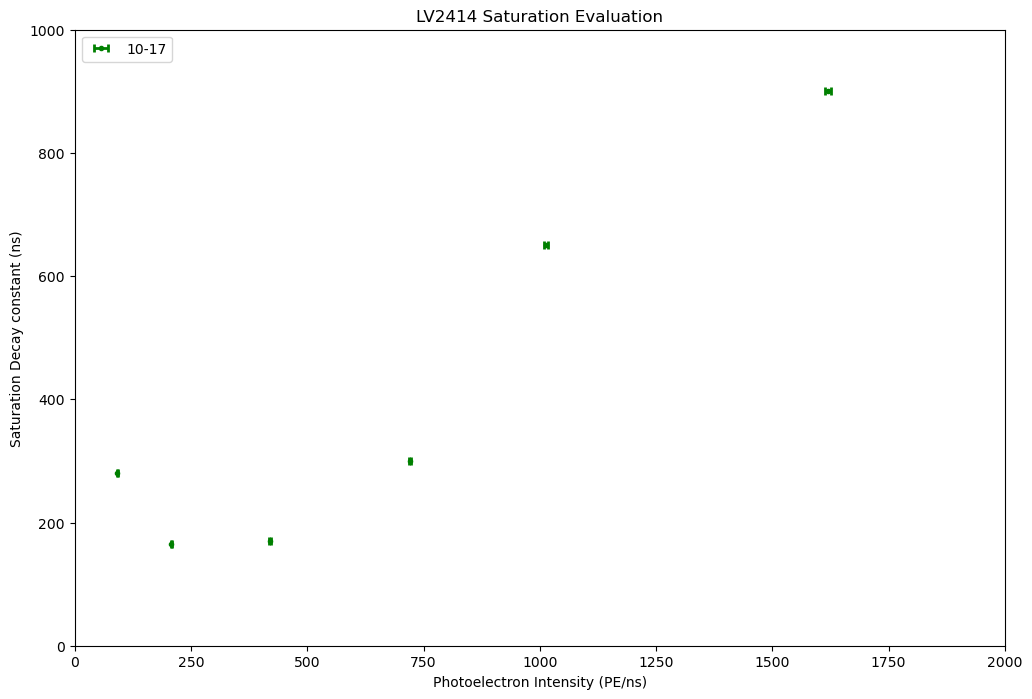

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
ax.errorbar(df_1017.pe_intensity, df_1017.tau, xerr=df_1017.pe_intensity_err,  fmt='.', ecolor='g', mfc='g', mec='g',  capsize=3, elinewidth=2, capthick=2, label='10-17')
# ax.errorbar(df_1017.filter_fix , df_1017.Ch0_Area_mu, xerr=df_1017.filter_fix_err, yerr=df_1017.Ch0_Area_sigma,  fmt='.', ecolor='black', mfc='black', mec='black',  capsize=3, elinewidth=2, capthick=2, label='Anode-0924')
ax.set_ylabel('Saturation Decay constant (ns)')
ax.set_xlabel('Photoelectron Intensity (PE/ns)')
ax.set_title('')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.axvline(x=5300, color='b', linestyle='--')
ax.legend(loc='upper left')
ax.set_xlim(000, 2e3)
ax.set_ylim(00, 1e3)
ax.set_title('LV2414 Saturation Evaluation')
#plt.savefig(r'./figs/LV2414_saturation_eval_20240924.png',  bbox_inches='tight',  dpi=300)
# tick_positions = plt.xticks()[0]
# tick_positions_to_show = tick_positions[:10]  # 只取前15个位置作为展示的刻度位置
# plt.gca().set_xticks(tick_positions_to_show)  # 设置这些位置为刻度位置
plt.show()

In [71]:
print(r'file_tag:{}, pe_intensity:{} PE/ns, decay_constant:{} ns'.format(df_1017.file_tag,  df_1017.pe_intensity, df_1017.tau))

file_tag:2     20241017_980mv_900mv_1us_attenuator_9DB_run0.h5df
1           20241014_1.040v_900mv_1000ns_attenuator_9DB
0           20241014_1.120v_900mv_1000ns_attenuator_9DB
6     20241017_1.240v_900mv_1us_attenuator_9DB_run0....
10     20241017_2v_900mv_600ns_attenuator_9DB_run0.h5df
8     20241017_1.60v_900mv_1us_attenuator_9DB_run0.h5df
Name: file_tag, dtype: object, pe_intensity:2       91.868077
1      207.136050
0      420.341773
6      720.832946
10    1620.341627
8     1012.993925
Name: pe_intensity, dtype: float64 PE/ns, decay_constant:2     280.0
1     165.0
0     170.0
6     300.0
10    900.0
8     650.0
Name: tau, dtype: float64 ns
